In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(219)

## hyperparameters

In [2]:
k_armed_bandit = 10
#reward_dist_mean = np.random.uniform(low=-2.0, high=2.0, size=[k_armed_bandit])
reward_dist_mean = np.random.normal(loc=0.0, scale=1.0, size=[k_armed_bandit])
print("reward_dist_mean: expected reward q*")
print(reward_dist_mean)
#reward_dist_stddev = np.random.uniform(low=0.0, high=2.0, size=[k_armed_bandit])
reward_dist_stddev = np.full((k_armed_bandit), 1.0)
print("reward_dist_stddev: standard deviation of expected reward q*")
print(reward_dist_stddev)

optimal_action = np.argmax(reward_dist_mean)

max_steps = 1000
max_episodes = 2000
epsilon = 0.1

reward_dist_mean: expected reward q*
[-0.57136961 -0.79957744  0.25927551  0.53070607  1.07957281 -0.24434696
  1.51111158  0.24604793 -0.51050475  0.68989384]
reward_dist_stddev: standard deviation of expected reward q*
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## definition of function and class

In [3]:
def k_armed_bandit_machine(arm_number):
  """ k armed bandit machine
  Args:
    arm_number: int, machine number we select. [0, k_armed_bandit-1]
    
  Returns:
    reward: reward of the machine we select from normal distribution.
  """
  assert arm_number < k_armed_bandit
  return np.random.normal(loc=reward_dist_mean[arm_number],
                          scale=reward_dist_stddev[arm_number])

In [4]:
class q_function:
  def __init__(self):
    self.q_values = np.full((k_armed_bandit), 0.0)
    self.q_values_count = np.full((k_armed_bandit), 0.0)
    
  def select_action(self):
    return np.argmax(self.q_values)
  
  def update(self, reward, action):
    self.q_values_count[action] += 1
    #self.q_values[action] += reward
    self.q_values[action] += (reward - self.q_values[action]) / self.q_values_count[action]

## Training

### one episode

In [5]:
my_q = q_function()
for step in range(max_steps):
  #print(my_q.q_values)
  #print(my_q.q_values_count)
  
  # epsilon greedy method
  if epsilon < np.random.rand():
    action = my_q.select_action()
  else:
    action = np.random.choice(k_armed_bandit)
    
  #print(action)
  reward = k_armed_bandit_machine(action)
  #print(reward)
  my_q.update(reward, action)

### 2000 episodes, epsilon = 0.1

In [6]:
average_rewards_1 = np.zeros(max_steps)
optimal_action_1 = np.zeros(max_steps)
for episode in range(max_episodes):
  my_q = q_function()
  for step in range(max_steps):
    # epsilon greedy method
    if epsilon < np.random.rand():
      action = my_q.select_action()
    else:
      action = np.random.choice(k_armed_bandit)

    if action == optimal_action:
      optimal_action_1[step] += 1.0
      
    reward = k_armed_bandit_machine(action)
    average_rewards_1[step] += reward
    my_q.update(reward, action)
    
average_rewards_1 /= max_episodes
optimal_action_1 /= max_episodes

### 2000 episodes, epsilon = 0.01

In [7]:
epsilon = 0.01
average_rewards_2 = np.zeros(max_steps)
optimal_action_2 = np.zeros(max_steps)
for episode in range(max_episodes):
  my_q = q_function()
  for step in range(max_steps):
    # epsilon greedy method
    if epsilon < np.random.rand():
      action = my_q.select_action()
    else:
      action = np.random.choice(k_armed_bandit)
      
    if action == optimal_action:
      optimal_action_2[step] += 1.0

    reward = k_armed_bandit_machine(action)
    average_rewards_2[step] += reward
    my_q.update(reward, action)
    
average_rewards_2 /= max_episodes
optimal_action_2 /= max_episodes

### 2000 episodes, epsilon = 0.0

In [8]:
epsilon = 0.0
average_rewards_3 = np.zeros(max_steps)
optimal_action_3 = np.zeros(max_steps)
for episode in range(max_episodes):
  my_q = q_function()
  for step in range(max_steps):
    # epsilon greedy method
    if epsilon < np.random.rand():
      action = my_q.select_action()
    else:
      action = np.random.choice(k_armed_bandit)
      
    if action == optimal_action:
      optimal_action_3[step] += 1.0

    reward = k_armed_bandit_machine(action)
    average_rewards_3[step] += reward
    my_q.update(reward, action)
    
average_rewards_3 /= max_episodes
optimal_action_3 /= max_episodes

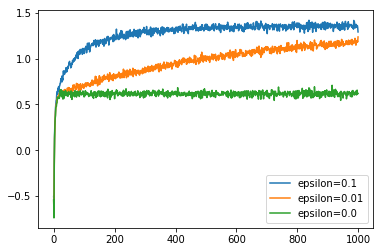

In [9]:
plt.plot(range(max_steps), average_rewards_1, label='epsilon=0.1')
plt.plot(range(max_steps), average_rewards_2, label='epsilon=0.01')
plt.plot(range(max_steps), average_rewards_3, label='epsilon=0.0')
plt.legend()
plt.show()

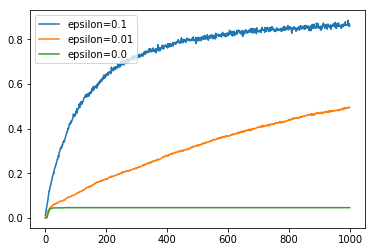

In [10]:
plt.plot(range(max_steps), optimal_action_1, label='epsilon=0.1')
plt.plot(range(max_steps), optimal_action_2, label='epsilon=0.01')
plt.plot(range(max_steps), optimal_action_3, label='epsilon=0.0')
plt.legend()
plt.show()